In [ ]:
import pandas as pd
from fredapi import Fred
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
# Initialize the FRED API with your key
fred = Fred(api_key='bc5fb1faff7918cddae2c00e8258842c') # Replace my APIKEY with "YOUR_API_KEY"

# List of Treasury yield series IDs
series_ids = ['DGS1MO', 'DGS3MO', 'DGS6MO', 'DGS1', 'DGS2', 'DGS3', 'DGS5', \
              'DGS7', 'DGS10', 'DGS20', 'DGS30']

# Function to get data for a single series
def get_yield_data(series_id):
    data = fred.get_series(series_id, observation_start="1975-01-01", observation_end="2024-05-03")
    return data

# Get data for all series
yields_dict = {series_id: get_yield_data(series_id) for series_id in series_ids}

# Combine into a single DataFrame
yields = pd.DataFrame(yields_dict)

# Rename columns for clarity
yields.columns = ['1 Month', '3 Month', '6 Month', '1 Year', '2 Year', '3 Year', '5 Year', \
                  '7 Year', '10 Year', '20 Year', '30 Year']

In [9]:
yields.index = pd.to_datetime(yields.index)
yields.loc['2020-01-03']

1 Month    1.52
3 Month    1.52
6 Month    1.55
1 Year     1.55
2 Year     1.53
3 Year     1.54
5 Year     1.59
7 Year     1.71
10 Year    1.80
20 Year    2.11
30 Year    2.26
Name: 2020-01-03 00:00:00, dtype: float64

In [10]:
yields.isna().sum()

1 Month    7180
3 Month    2204
6 Month    2204
1 Year      542
2 Year      894
3 Year      542
5 Year      542
7 Year      542
10 Year     542
20 Year    2231
30 Year    1072
dtype: int64

In [12]:
# We can see that during the days that the 10-year is not reported,
# none maturity is reported as well.
yields[yields['10 Year'].isna()==True].sum()


1 Month    0.0
3 Month    0.0
6 Month    0.0
1 Year     0.0
2 Year     0.0
3 Year     0.0
5 Year     0.0
7 Year     0.0
10 Year    0.0
20 Year    0.0
30 Year    0.0
dtype: float64

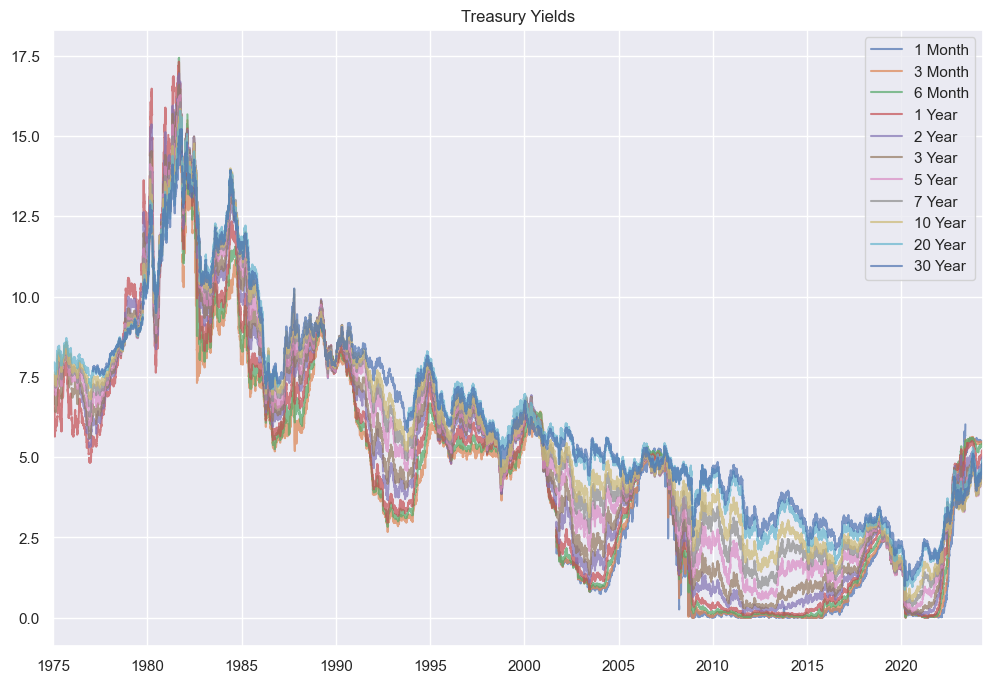

In [14]:
yields.plot(figsize=(12, 8), title='Treasury Yields', alpha=0.7)
# Plot the yields
plt.show()

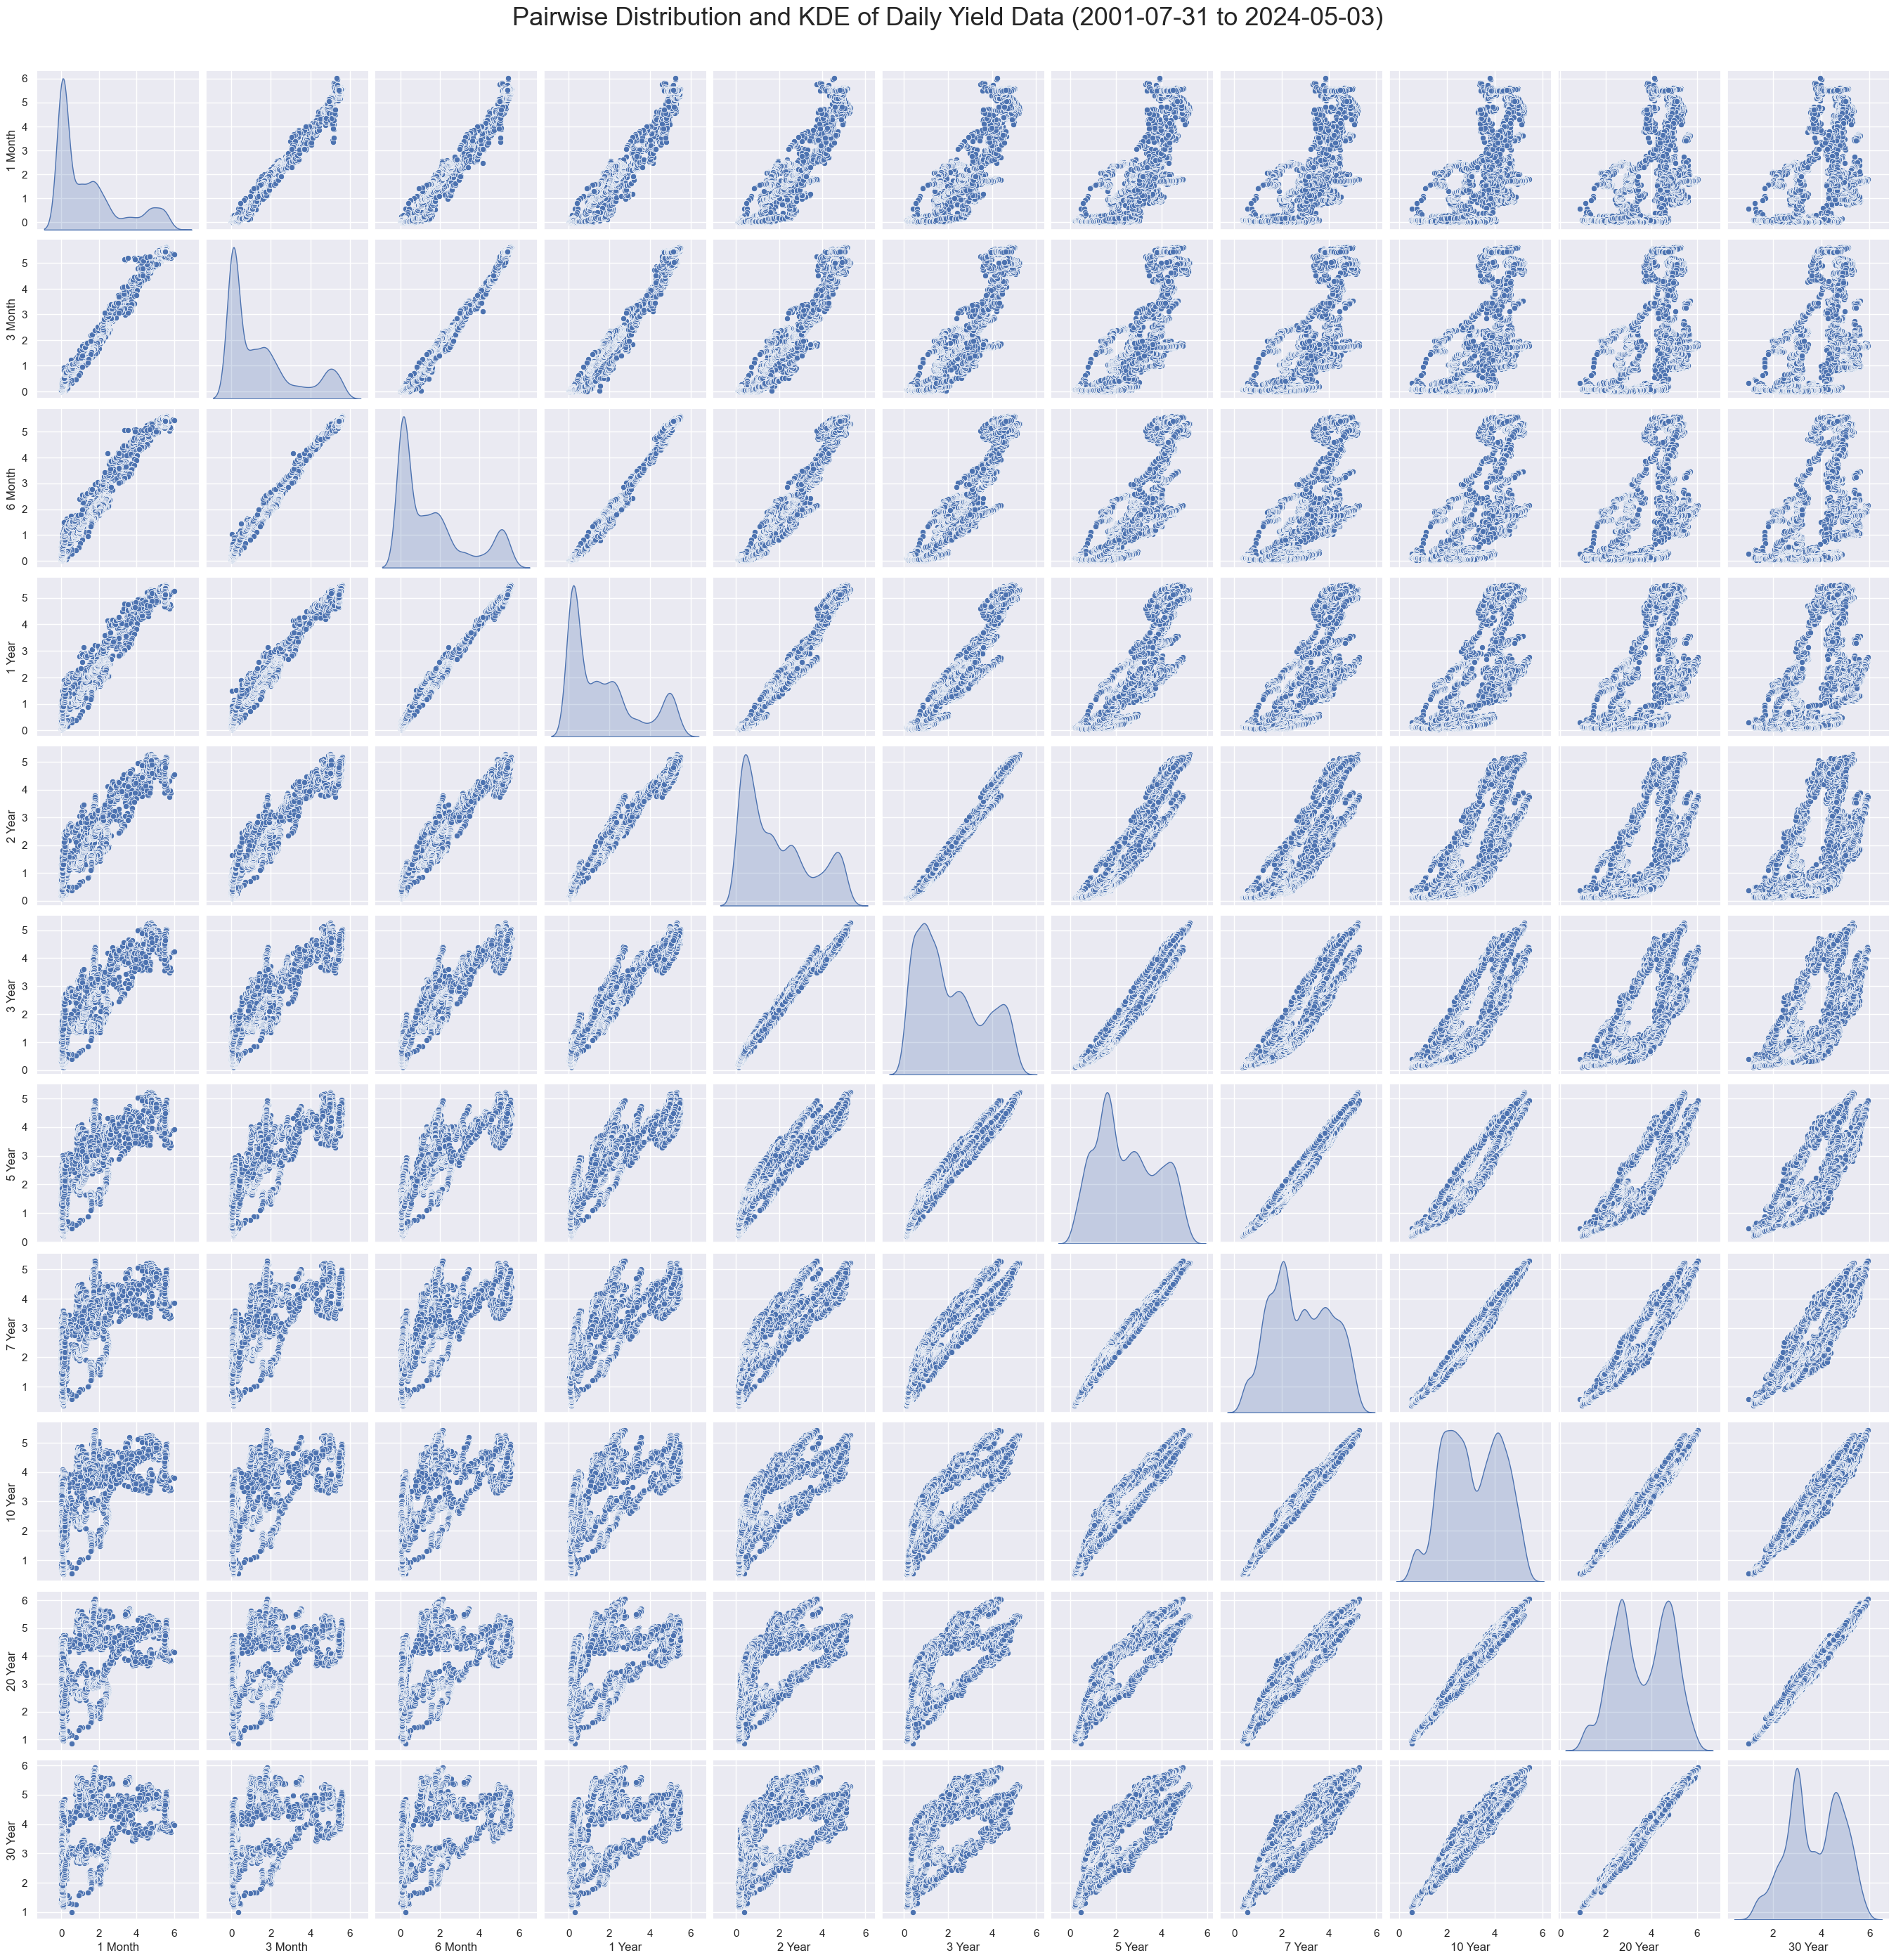

In [19]:
# Figure 2
sns.pairplot(yields.dropna(), diag_kind='kde') # Pairplot with KDE on the diagonal
plt.suptitle("Pairwise Distribution and KDE of Daily Yield Data (2001-07-31 to 2024-05-03)",
             y=1.02, fontsize=26)
plt.show()

#sns.pairplot(yields.dropna(), diag_kind='kde'):

#sns.pairplot(...): This function is part of the Seaborn library, which is used for statistical data visualization. It creates a matrix of scatter plots for each pair of variables in the DataFrame.
#yields.dropna():
#This method is called on the yields DataFrame to remove any rows with missing values (NaNs). This ensures that the pairplot only includes complete cases for accurate visual representation.
#diag_kind='kde':
#This parameter specifies the type of plot to display on the diagonal of the pairplot. By setting it to 'kde', it indicates that Kernel Density Estimation (KDE) plots will be used on the diagonal instead of histograms. KDE plots provide a smooth estimate of the distribution of a variable.
#plt.suptitle(...):

#This function from Matplotlib sets a title for the entire figure (the pairplot).
#Parameters:
#"Pairwise Distribution and KDE of Daily Yield Data (2001-07-31 to 2024-05-03)": This is the title text that describes what the pairplot represents.
#y=1.02: This adjusts the vertical position of the title. A value greater than 1 moves the title above the plo
#This function is intended to display the plot. However, it's important to note that in Seaborn, you typically use plt.show() from Matplotlib to display the plot. If you are using Jupyter notebooks, the plots may automatically render without needing to call this function.

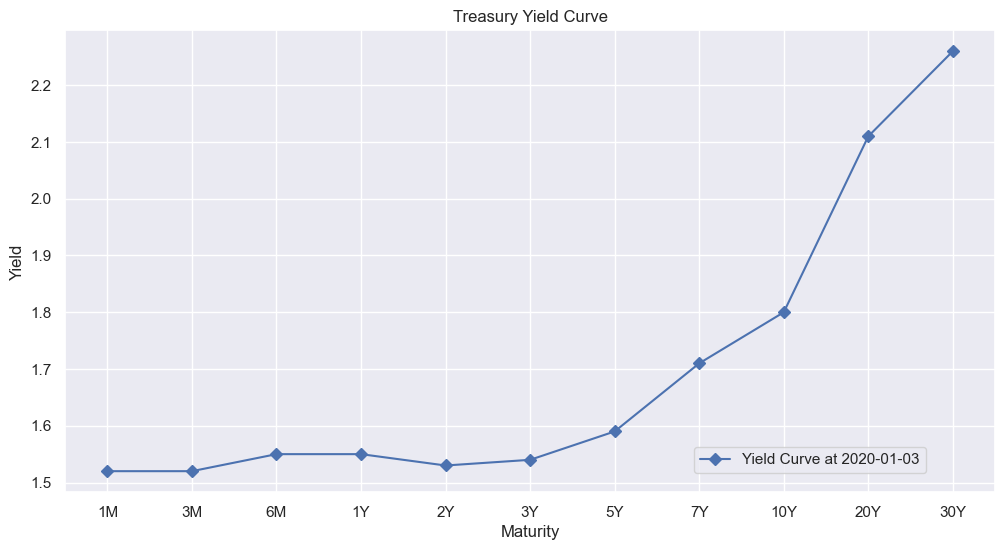

In [38]:

def plot_yield_curve(date):
    maturities = ['1M', '3M', '6M', '1Y', '2Y', '3Y', '5Y', '7Y', '10Y', '20Y', '30Y'] # Maturities
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(maturities, yields.loc[date], marker='D', label='Yield Curve at ' + date)

       
    ax.set(title='Treasury Yield Curve')
    ax.set_xlabel('Maturity')
    ax.set_ylabel('Yield')
    fig.legend(loc = [0.69, 0.14])

    # Show the plot
    plt.grid(True)
    plt.show()

plot_yield_curve('2020-01-03')
##def plot_yield_curve(date):
#This line defines a function named plot_yield_curve that takes a single argument, date. This date will be used to retrieve yield data for plotting.
#Maturities Definition:
#maturities = ['1M', '3M', '6M', '1Y', '2Y', '3Y', '5Y', '7Y', '10Y', '20Y', '30Y']  # Maturities
#Here, a list of maturities is defined, representing different time periods for treasury yields, such as 1 month (1M) to 30 years (30Y).
#Figure and Axis Creation:

#fig, ax = plt.subplots(figsize=(12, 6))
#This line creates a new figure (fig) and a set of subplots (ax) using Matplotlib. The figure size is set to 12 inches wide and 6 inches tall.
#Plotting the Yield Curve:

#ax.plot(maturities, yields.loc[date], marker='D', label='Yield Curve at ' + date)
#The plot method is called on the axis (ax) to create a line plot.
#yields.loc[date] retrieves the yield data for the specified date from a DataFrame called yields.
#The marker='D' option uses diamond markers for the data points, and the label parameter adds a label for the legend that includes the date.
#Formatting the Y-Axis Labels:

#ax.set_yticklabels(['{:.2f}%'.format(y) for y in ax.get_yticks()])
#This line formats the y-axis labels to display as percentages with two decimal places. It retrieves the current y-ticks using ax.get_yticks() and formats them accordingly.
#Setting X-Ticks:

#ax.set_xticks(range(len(maturities)))
#ax.set_xticklabels(maturities)
#The first line sets the x-ticks to correspond to the indices of the maturities.
#The second line labels these ticks with the maturity names defined earlier.
#Adding Labels and Title:

#ax.set_xlabel('Maturity')
#ax.set_ylabel('Yield')
#ax.set_title('Treasury Yield Curve')
#These lines add labels to the x-axis and y-axis, as well as a title to the plot, providing context to the viewer.
#Adding a Legend:

#fig.legend(loc=[0.69, 0.14])
#This line adds a legend to the figure at the specified location (69% across the width and 14% down the height of the figure).
#Showing the Plot:

#plt.grid(True)
#plt.show()
#plt.grid(True) enables a grid on the plot to enhance readability.
#plt.show() displays the plot in a window or inline (if using a Jupyter notebook).
#Function Call:

#plot_yield_curve('2020-01-03')
#Finally, this line calls the plot_yield_curve function with the date '2020-01-03', generating and displaying the yield curve for that specific date.

C:\Users\pc\AppData\Local\Temp\ipykernel_6928\3871863275.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  resampled_monthly_bond_market_crash = bond_market_crash.resample('M').last()


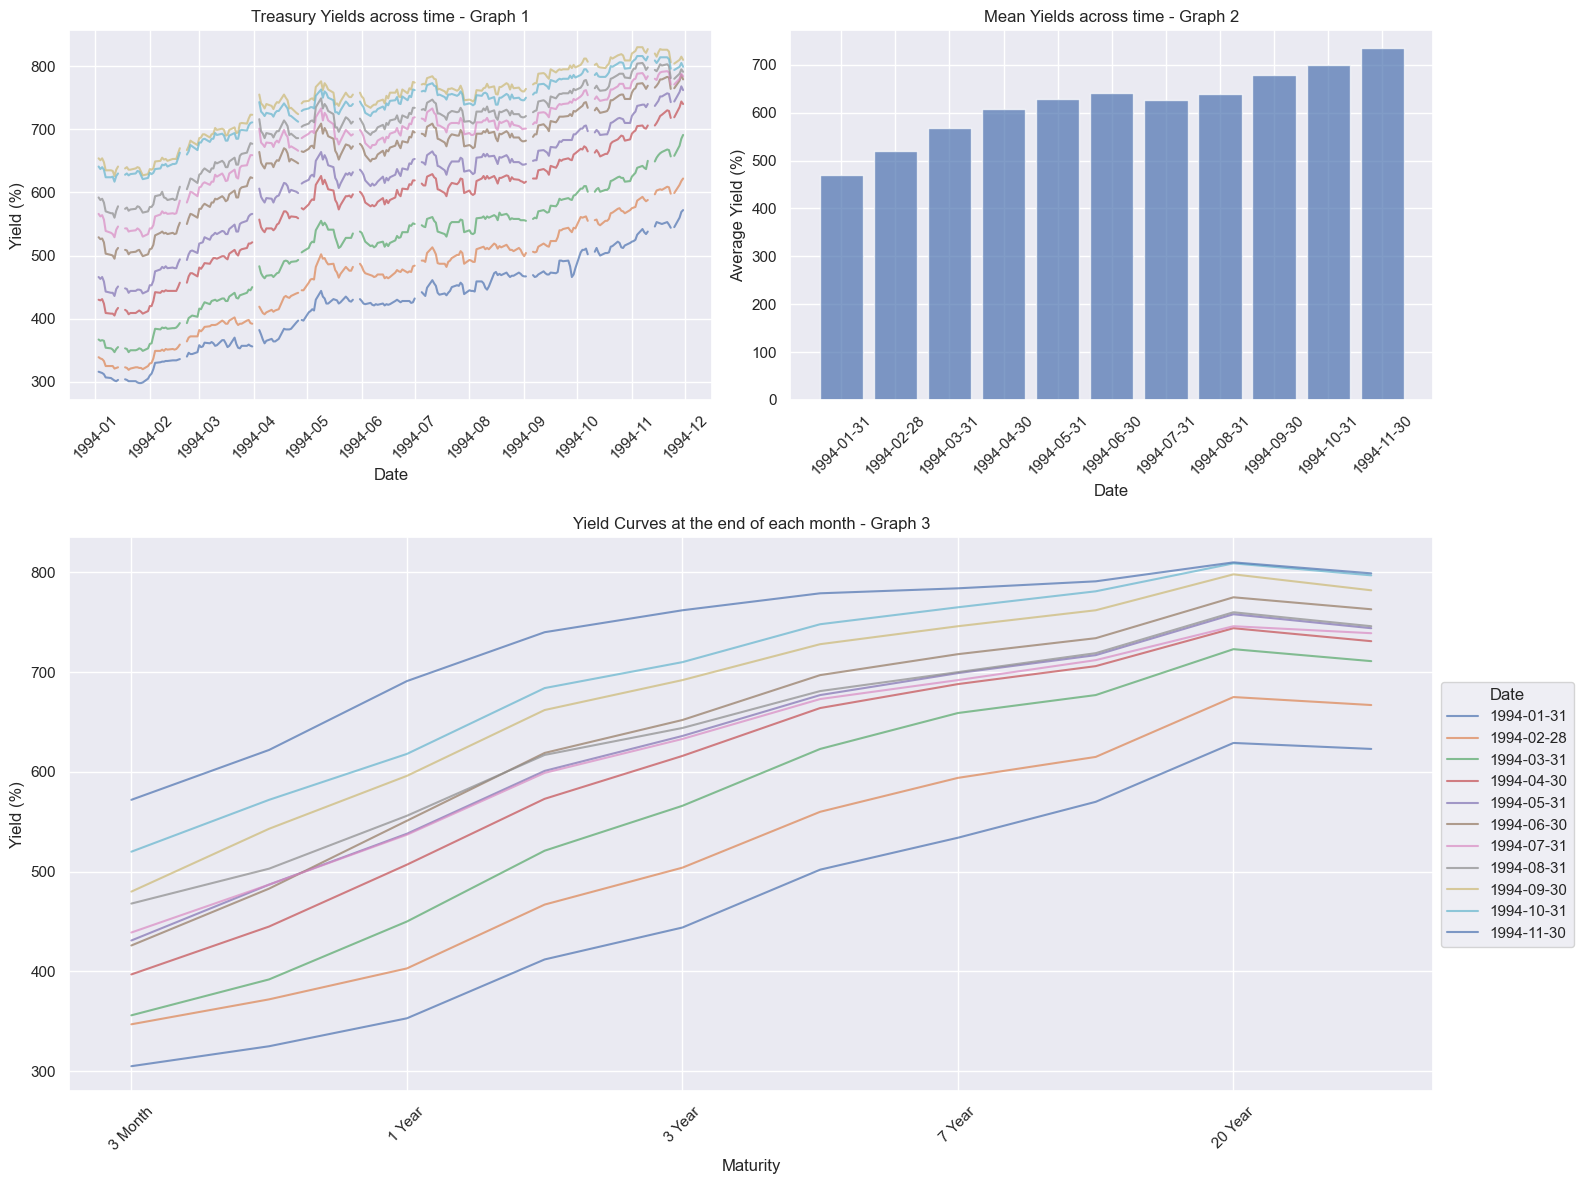

In [40]:
#figure 4

from matplotlib.gridspec import GridSpec

# Preparing the data
bond_market_crash = yields.loc['1994-01-03': '1994-11-30'].iloc[:,1:] * 100  # Convert yields to percentage
resampled_monthly_bond_market_crash = bond_market_crash.resample('M').last()
resampled_monthly_bond_market_crash_ticks = resampled_monthly_bond_market_crash.index.strftime('%Y-%m-%d')

# Creating the plt object
fig = plt.figure(figsize=(16, 12))
gs = GridSpec(2, 2, height_ratios=[1, 1.5])

# First row, first column
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(bond_market_crash, alpha=0.7)
ax1.set_title('Treasury Yields across time - Graph 1')
ax1.set_xlabel('Date')
ax1.set_ylabel('Yield (%)')
ax1.tick_params(axis='x', rotation=45)

# First row, second column
ax2 = fig.add_subplot(gs[0, 1])
ax2.bar(resampled_monthly_bond_market_crash_ticks, resampled_monthly_bond_market_crash.mean(axis=1), alpha=0.7)
ax2.set_title('Mean Yields across time - Graph 2')
ax2.set_xlabel('Date')
ax2.set_ylabel('Average Yield (%)')
ax2.tick_params(axis='x', rotation=45)

# Second row
ax3 = fig.add_subplot(gs[1, :])
for i in range(len(resampled_monthly_bond_market_crash)):
    date = resampled_monthly_bond_market_crash_ticks[i]
    resampled_monthly_bond_market_crash.iloc[i, :].plot(ax=ax3, alpha=0.7, label=date)

ax3.set_title('Yield Curves at the end of each month - Graph 3')
ax3.set_xlabel('Maturity')
ax3.set_ylabel('Yield (%)')
ax3.legend(title='Date', loc='center left', bbox_to_anchor=(1, 0.5))
ax3.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Figure 5

# Preparing the data
bear_flattening = yields['2004-06-01':'2006-06-30'].resample('3M').last()
bear_flattening.index = bear_flattening.index.strftime('%Y-%m-%d')

bull_flattening = yields['2010-01-01':'2012-06-30'].resample('4M').last()
bull_flattening.index = bull_flattening.index.strftime('%Y-%m-%d')

# Creating the plt object
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bear flattening graph
for i in range(len(bear_flattening)):
    date = bear_flattening.index[i]
    ax1.plot(bear_flattening.columns, bear_flattening.iloc[i, :], alpha=0.7, label=date)
ax1.set_title('Bear Flattening: 2004 - 2006')
ax1.set_xlabel('Maturity')
ax1.set_ylabel('Yield (%)')
ax1.legend(title='Date', loc='center left', bbox_to_anchor=(1, 0.5))
ax1.tick_params(axis='x', rotation=45)

# Bull flattening graph
for i in range(len(bull_flattening)):
    date = bull_flattening.index[i]
    ax2.plot(bull_flattening.columns, bull_flattening.iloc[i, :], alpha=0.7, label=date)
ax2.set_title('Bull Flattening: 2010 - 2012')
ax2.set_xlabel('Maturity')
ax2.set_ylabel('Yield (%)')
ax2.legend(title='Date', loc='center left', bbox_to_anchor=(1, 0.5))
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()